# swiss model



the date of peak is: 0

maximum active population: 13749


the date of peak is: 36

maximum active population: 212581


the date of peak is: 85

maximum active population: 425151


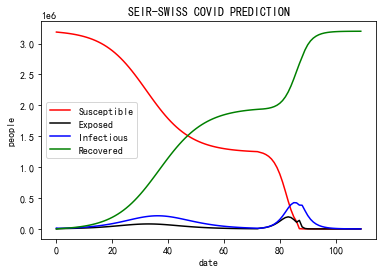

In [3]:
# -*- coding: utf-8 -*-
"""
@author: Junling
"""
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt





def calc(T, b1, b2, b3, b4):
    j = 10
    k = 8
    m = 3
    stage1 =71
    stage2 = 85
    stage3 = 91
    # contact = 20.23
    contact = 20.23
    contact2 = 39


    for i in range(0, len(T) - 1):

        if (i <= stage1):   # make sure: r1>r3 r2>r4


            r1 = contact * j * 0.1
            r2 = contact * j * 0.1
            r3 = contact - r1
            r4 = contact - r2
            r11 = r1
            r12 = r2
            r13 = r3
            r14 = r4
            j1 = j

        elif (i <= stage2):  
            r1 = contact2 * k * 0.1
            r2 = 4 * k * 0.1
            r3 = contact2 - r1  
            r4 = 4 - r2 
            r21 = r1
            r22 = r2
            r23 = r3
            r24 = r4
            k1 = k


        elif (i <= stage3):
            r1 = (contact2 - (i - stage2) * ((contact2-4) / (stage3 - stage2))) * m * 0.1
            r2 = 4 * m * 0.1
            r3 = (contact2 - (i - stage2) * ((contact2-4) / (stage3 - stage2))) - r1
            r4 = 4 - r2
            r31 = r1
            r32 = r2
            r33 = r3
            r34 = r4
            m1 = m


        else:
            r1 = 0
            r2 = 0
            r3 = 4
            r4 = 4

        S.append(
            S[i] - r1 * b1 * S[i] * I[i] / N - r2 * b2 * S[i] * E[i] / N - r3 * b3 * S[i] * I[i] / N - r4 * b4 * S[i] *
            E[i] / N)
        E.append(E[i] + r1 * b1 * S[i] * I[i] / N - a * E[i] + r2 * b2 * S[i] * E[i] / N + r3 * b3 * S[i] * I[
            i] / N + r4 * b4 * S[i] * E[i] / N)
        I.append(I[i] + a * E[i] - y * I[i])
        R.append(R[i] + y * I[i])
        if (I[i] - I[i - 1] < 0 and I[i - 1] - I[i - 2] > 0):
            # print()
            print("\n\nthe date of peak is: %d" % (i - 1))
            print("\nmaximum active population: %d" % (I[i - 1]))
            # print(i-1)
            # print(I[i-1])


def plot(T, S, E, I, R):
    fig = plt.figure()
    plt.title("SEIR-SWISS COVID PREDICTION")
    plt.plot(T, S, color='r', label='Susceptible')
    plt.plot(T, E, color='k', label='Exposed')
    plt.plot(T, I, color='b', label='Infectious')
    plt.plot(T, R, color='g', label='Recovered')
    plt.grid(False)
    plt.legend()
    plt.xlabel("date")
    plt.ylabel("people")
    plt.show()
    fig.savefig("C:\\Users\\Junling_W\\Desktop\\DS soci eco tech\\SEIR\\Swissgraph.png")


if __name__ == '__main__':

    N = 8000000*0.4  

    E = []  # expose
    E.append(0)
    I = []  # infectious
    I.append(13749)
    S = []  # susceptible
    S.append(N - I[0])
    R = []  # recovered
    R.append(0)
    a = 0.78735  # rate of exposed turn to infectious
    y = 0.289  # recover rate
    b1 =0.016
    b2 = 0.016
    b3 = 0.3
    b4 = 0.3

    T = [i for i in range(0, 110)]  # time span
    calc(T, b1, b2, b3, b4)
    plot(T, S, E, I, R)

In [4]:
from pandas.core.frame import DataFrame
c={"T" : T,
   "S" : S,
  "E":E,
  "I":I,
  "R":R}#将列表a，b转换成字典
data=DataFrame(c)#将字典转换成为数据框
print(data)
data.to_csv('C:\\Users\\Junling_W\\Desktop\\swiss_prediction.csv',index=False,mode='a',header=True) 

       T             S            E             I             R
0      0  3.186251e+06     0.000000  13749.000000  0.000000e+00
1      1  3.181820e+06  4431.155430   9775.539000  3.973461e+03
2      2  3.177248e+06  5514.583042  10439.278457  6.798592e+03
3      3  3.172120e+06  6299.905587  11764.233941  9.815543e+03
4      4  3.166324e+06  7135.734192  13324.600996  1.321541e+04
..   ...           ...          ...           ...           ...
105  105  2.024272e+02     0.201980   1324.517875  3.198473e+06
106  106  2.023266e+02     0.143511    941.891239  3.198856e+06
107  107  2.022551e+02     0.101992    669.797664  3.199128e+06
108  108  2.022043e+02     0.072498    476.306443  3.199321e+06
109  109  2.021682e+02     0.051539    338.710962  3.199459e+06

[110 rows x 5 columns]
